<a href="https://colab.research.google.com/github/SeongDahun/RecsysTutorial/blob/main/CTGAN_Credit_anomal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In this tutorial we use the defaul version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [34]:
!pip install ctgan

In [35]:
!pip install table_evaluator

Now we download a dataset that includes both continuous and discrete values. I chose a random dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [36]:
#!gdown 1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ #Insurance 데이터 불러오기 (아마 다른 사람 드라이브에서 다운로드?)

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/creditcard.csv')

In [39]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,"172,786.0000",-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,...,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,"172,787.0000",-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,...,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,"172,788.0000",1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,...,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,"172,788.0000",-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,...,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


In [40]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [41]:
# 정상 데이터 추출
nomalies = data[data['Class'] == 0]
nomalies

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,"172,786.0000",-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,...,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,"172,787.0000",-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,...,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,"172,788.0000",1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,...,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,"172,788.0000",-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,...,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


In [42]:
# # 정상 데이터 줄이는 경우
# sample_nomalies = nomalies.sample(frac=0.1)
# sample_nomalies.info(memory_usage='deep')

In [43]:
# 이상 데이터 추출
anomalies = data[data['Class'] == 1]
anomalies

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0000,-2.3122,1.9520,-1.6099,3.9979,-0.5222,-1.4265,-2.5374,1.3917,-2.7701,...,0.5172,-0.0350,-0.4652,0.3202,0.0445,0.1778,0.2611,-0.1433,0.0000,1
623,472.0000,-3.0435,-3.1573,1.0885,2.2886,1.3598,-1.0648,0.3256,-0.0678,-0.2710,...,0.6617,0.4355,1.3760,-0.2938,0.2798,-0.1454,-0.2528,0.0358,529.0000,1
4920,"4,462.0000",-2.3033,1.7592,-0.3597,2.3302,-0.8216,-0.0758,0.5623,-0.3991,-0.2383,...,-0.2942,-0.9324,0.1727,-0.0873,-0.1561,-0.5426,0.0396,-0.1530,239.9300,1
6108,"6,986.0000",-4.3980,1.3584,-2.5928,2.6798,-1.1281,-1.7065,-3.4962,-0.2488,-0.2478,...,0.5736,0.1770,-0.4362,-0.0535,0.2524,-0.6575,-0.8271,0.8496,59.0000,1
6329,"7,519.0000",1.2342,3.0197,-4.3046,4.7328,3.6242,-1.3577,1.7134,-0.4964,-1.2829,...,-0.3791,-0.7042,-0.6568,-1.6327,1.4889,0.5668,-0.0100,0.1468,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,"169,142.0000",-1.9279,1.1257,-4.5183,1.7493,-1.5665,-2.0105,-0.8828,0.6972,-2.0649,...,0.7786,-0.3192,0.6394,-0.2949,0.5375,0.7884,0.2927,0.1480,390.0000,1
280143,"169,347.0000",1.3786,1.2894,-5.0042,1.4118,0.4426,-1.3265,-1.4132,0.2485,-1.1274,...,0.3706,0.0282,-0.1456,-0.0810,0.5219,0.7395,0.3892,0.1866,0.7600,1
280149,"169,351.0000",-0.6761,1.1264,-2.2137,0.4683,-1.1205,-0.0033,-2.2347,1.2102,-0.6522,...,0.7518,0.8341,0.1909,0.0321,-0.7397,0.4711,0.3851,0.1944,77.8900,1
281144,"169,966.0000",-3.1138,0.5859,-5.3997,1.8171,-0.8406,-2.9435,-2.2080,1.0587,-1.6323,...,0.5833,-0.2692,-0.4561,-0.1837,-0.3282,0.6061,0.8849,-0.2537,245.0000,1


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [44]:
categorical_features = ['Class']

#Model training

Next, we simply define an instance of CTGAN Synthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [45]:
from ctgan import CTGAN

In [46]:
# 이상 데이터 학습
ctgan_anomal = CTGAN(verbose=True)
ctgan_anomal.fit(anomalies, categorical_features, epochs = 200)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'mi

Epoch 1, Loss G:  0.0737,Loss D: -0.0444
Epoch 2, Loss G:  0.0619,Loss D: -0.0509
Epoch 3, Loss G:  0.0952,Loss D: -0.0635
Epoch 4, Loss G:  0.0820,Loss D: -0.1144
Epoch 5, Loss G:  0.0790,Loss D: -0.1698
Epoch 6, Loss G:  0.0521,Loss D: -0.1819
Epoch 7, Loss G:  0.1107,Loss D: -0.2338
Epoch 8, Loss G:  0.0744,Loss D: -0.3587
Epoch 9, Loss G:  0.0224,Loss D: -0.3090
Epoch 10, Loss G:  0.0145,Loss D: -0.3961
Epoch 11, Loss G: -0.0717,Loss D: -0.4353
Epoch 12, Loss G: -0.1455,Loss D: -0.4684
Epoch 13, Loss G: -0.2655,Loss D: -0.5100
Epoch 14, Loss G: -0.2948,Loss D: -0.4463
Epoch 15, Loss G: -0.4357,Loss D: -0.4975
Epoch 16, Loss G: -0.5284,Loss D: -0.5391
Epoch 17, Loss G: -0.6112,Loss D: -0.4969
Epoch 18, Loss G: -0.8243,Loss D: -0.4354
Epoch 19, Loss G: -1.0014,Loss D: -0.3556
Epoch 20, Loss G: -1.0874,Loss D: -0.4436
Epoch 21, Loss G: -1.1239,Loss D: -0.3844
Epoch 22, Loss G: -1.2709,Loss D: -0.4611
Epoch 23, Loss G: -1.3595,Loss D: -0.2110
Epoch 24, Loss G: -1.3959,Loss D: -0.0564
E

#Synthetic data generation

In [73]:
# 이상 데이터의 증강 데이터 생성
synthetic_anomal = ctgan_anomal.sample(24108)
synthetic_anomal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,"68,789.6772",-0.3248,5.8513,-10.9500,4.1326,1.8999,-1.9433,-2.0768,-1.4552,1.8338,...,2.1000,5.3977,-0.0431,0.5787,0.5415,0.3316,-0.3685,0.0034,-55.1482,1
1,"-5,559.3799",-14.0970,4.3718,-0.3041,2.8671,2.9688,0.4254,-2.2244,0.9128,1.6638,...,0.9486,0.9318,-0.4817,0.1609,-0.8142,0.3058,-0.4507,-0.2066,-50.4172,1
2,"1,569.7811",-6.0553,16.8169,-4.5050,2.2676,-1.7505,0.2406,-2.2021,-29.8559,1.8736,...,-10.0536,1.8659,-1.0642,-0.0318,-0.0610,0.1197,0.2513,0.0968,-44.6206,1
3,"19,570.4778",-0.1201,0.5367,-3.8505,2.8413,0.4789,-3.2900,-1.8196,14.3404,0.9465,...,-1.7565,1.5888,-0.8765,0.4197,-0.9140,-0.1841,-0.9958,-0.4315,-23.0100,1
4,"69,389.3306",-0.6467,5.1141,-0.5401,1.4372,3.9095,-2.1747,2.0795,1.2855,-0.9205,...,12.6950,10.4922,7.8721,-0.3912,-0.5182,1.0357,-0.2487,0.4411,-11.5360,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48703,"141,193.7933",-13.3304,2.4602,-2.0961,1.5089,-1.9111,-1.6382,-10.2190,1.8564,-0.1913,...,1.0071,2.2181,2.2863,-0.0854,-2.1452,-0.2547,0.0873,-1.1431,-37.7046,1
48704,"84,757.1769",-4.0136,-5.8669,-13.8188,2.0523,2.7892,-3.3498,4.7579,-16.8427,-0.9234,...,2.6793,4.9200,1.3399,-0.5210,-2.1484,0.9183,-0.8889,0.2985,-21.3557,1
48705,"130,321.5211",0.2193,1.9650,1.7240,-1.1786,6.4610,-2.2845,-8.5430,-2.6472,-3.3929,...,-9.7715,-1.3225,0.4326,0.6860,0.4706,-0.0320,-0.3037,-0.2931,-26.5685,1
48706,"125,185.8449",-1.2016,14.2794,-2.9123,-0.0415,-2.7220,-1.2810,3.2998,1.7039,-1.4397,...,1.9605,1.5016,0.6604,-1.2755,-0.0469,0.9879,-4.3867,0.3046,-4.8413,1


In [74]:
# 원본 vs 원본+이상증강
  # extended_data = 원본+이상증강
extended_data = pd.concat([data, synthetic_anomal], ignore_index=True)
print(extended_data.shape)

In [49]:
# # 정상 데이터 줄이는 경우
#   # 정상 줄인 데이터 + 이상 증강 데이터
# extended_data = pd.concat([sample_nomalies, synthetic_anomal], ignore_index=True)

#Evaluation

In [50]:
from table_evaluator import TableEvaluator

In [51]:
# # 이상 데이터만 늘릴 때
#     # 이상 데이터 원본과 이상 데이터의 증강 데이터 비교
# print(anomalies.shape, synthetic_anomal.shape)
# table_evaluator_anomal =  TableEvaluator(anomalies, synthetic_anomal, cat_cols= categorical_features)

# # table_evaluator_anomal.visual_evaluation()

In [55]:
# # 정상 데이터 줄여서
#     # 정상 줄인 데이터 vs 정상 줄인+이상 증강 데이터 비교
# print(sample_nomalies.shape, extended_data.shape)
# table_evaluator_anomal =  TableEvaluator(sample_nomalies, extended_data, cat_cols= categorical_features)

(284807, 31) (333515, 31)


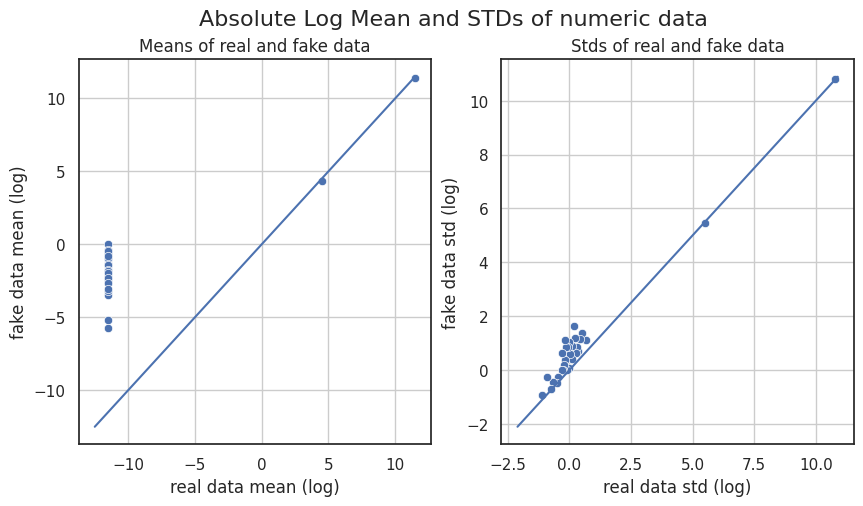

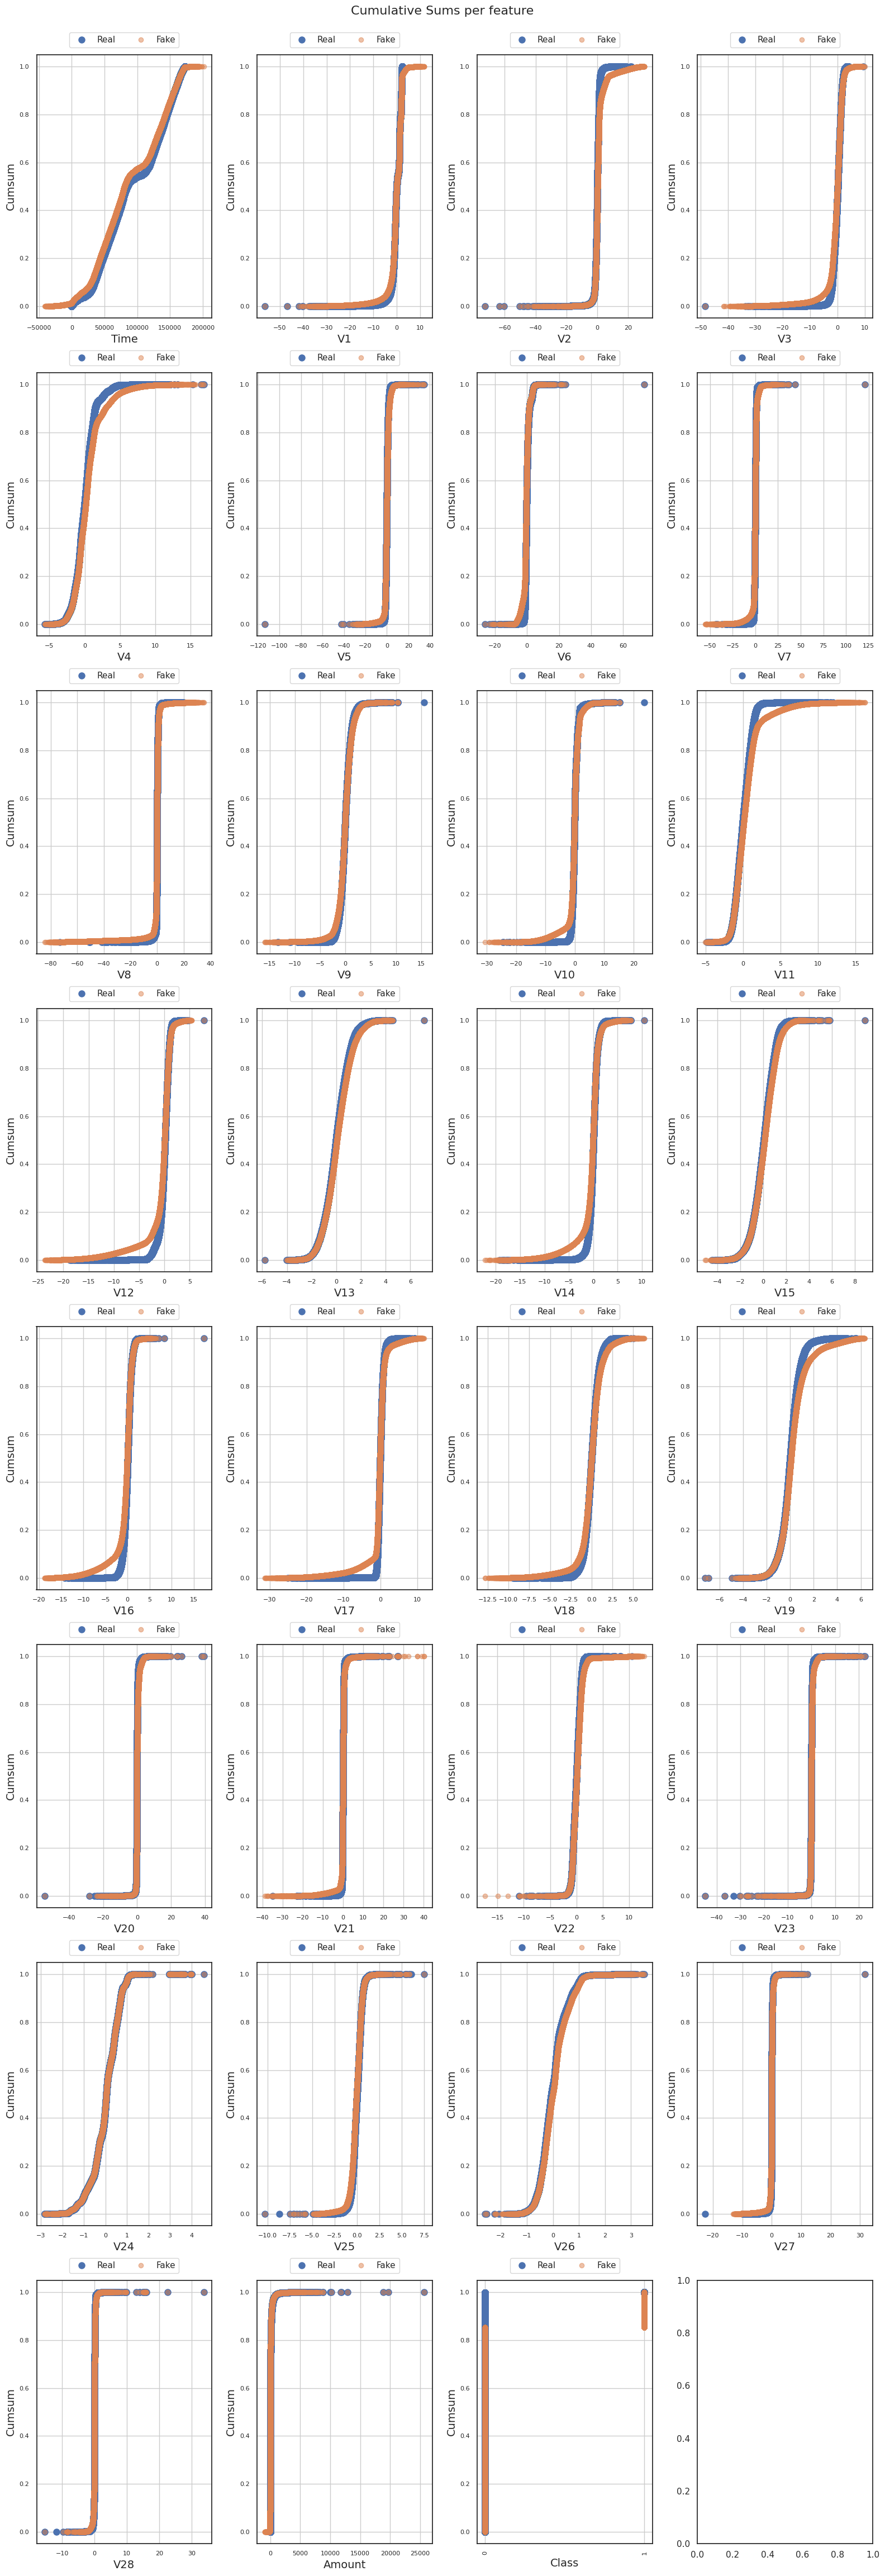

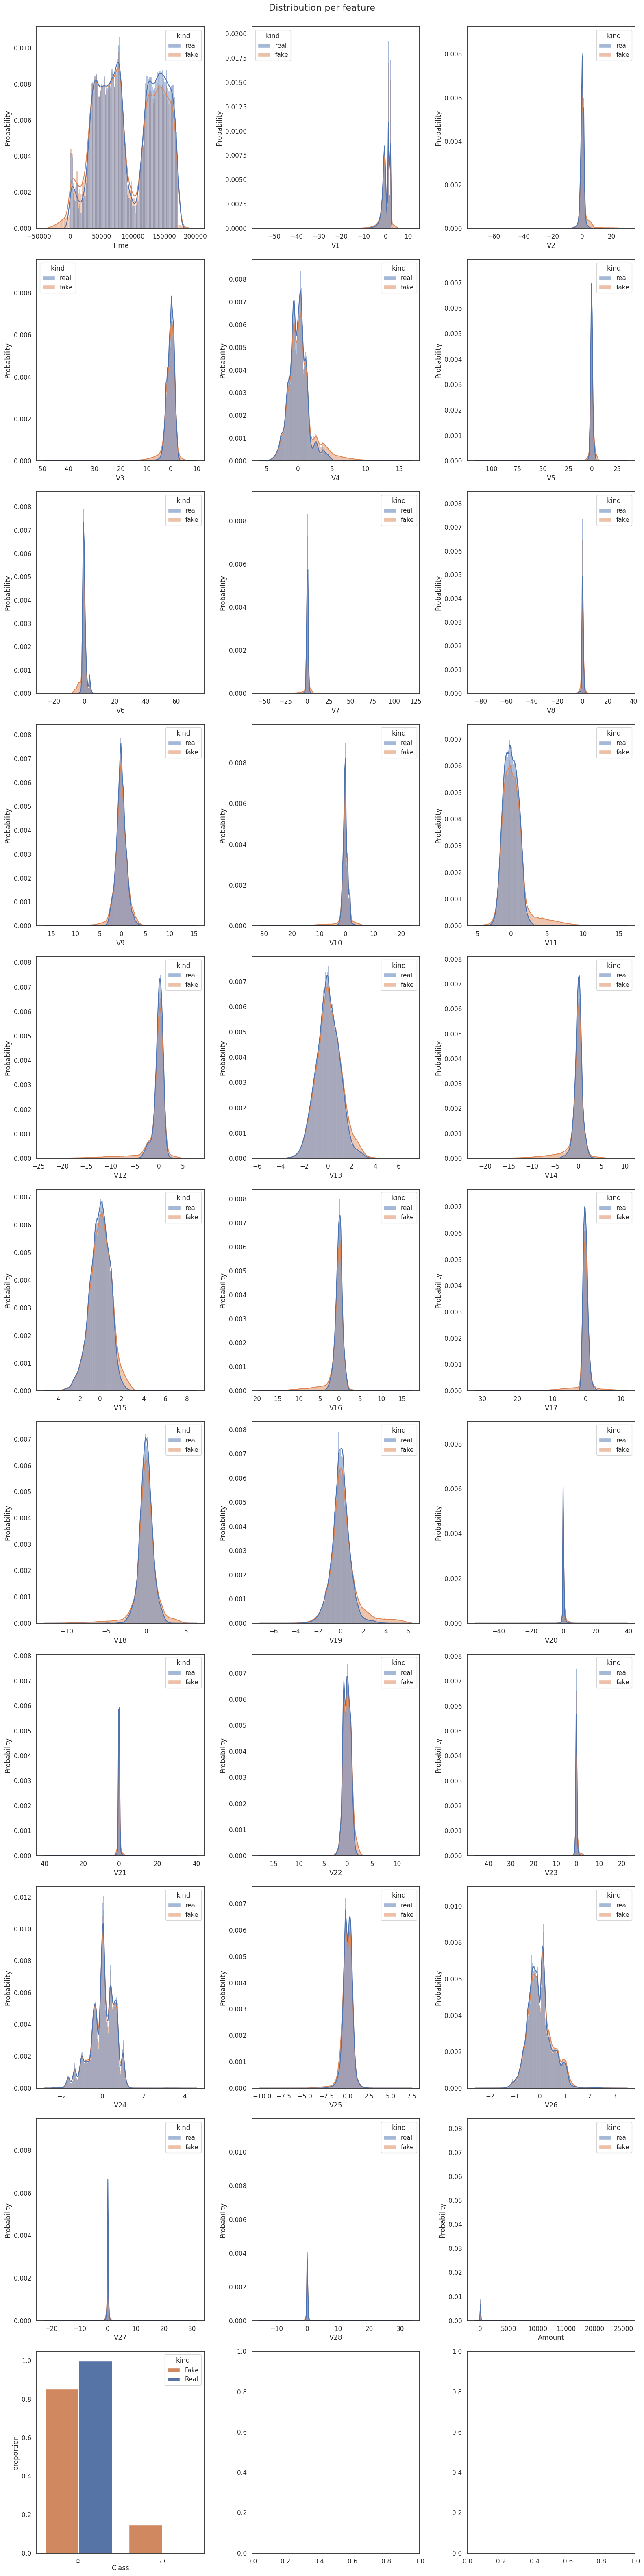

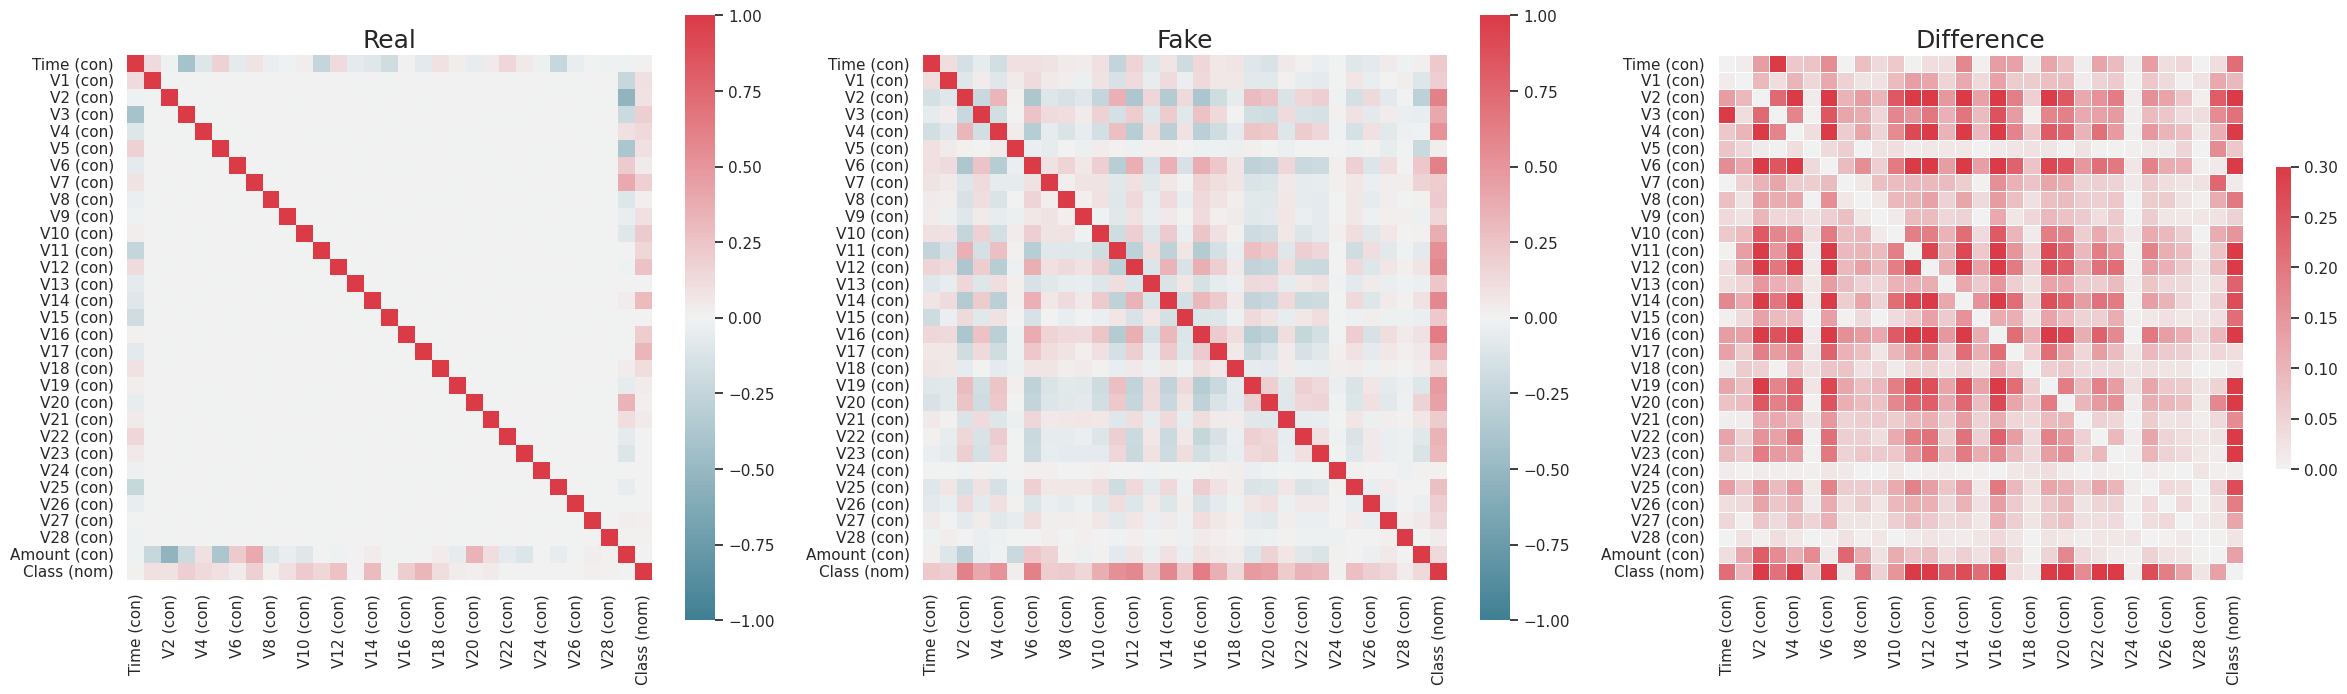

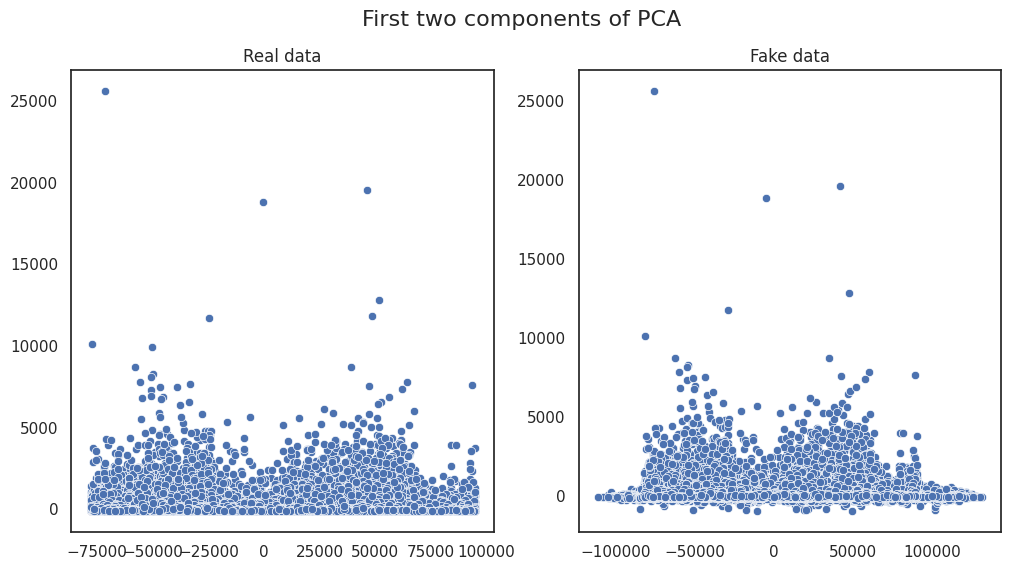

In [77]:
# 원본 vs 원본+증강이상
print(data.shape, extended_data.shape)
table_evaluator_anomal =  TableEvaluator(data, extended_data, cat_cols= categorical_features)
table_evaluator_anomal.visual_evaluation()

In [76]:
table_evaluator_anomal.evaluate(target_col='Class') # 한 컬럼에 대해서 유사도 검사. 범주형 데이터만 가능


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.9145   0.9983              0.8412
DecisionTreeClassifier_real   0.9992   0.9996              0.9979
LogisticRegression_fake       0.9200   0.9967              0.8529
LogisticRegression_real       0.9990   0.9983              0.9971
MLPClassifier_fake            0.8547   0.9973              0.7494
MLPClassifier_real            0.9984   0.9991              0.9968
RandomForestClassifier_fake   0.9229   0.9994              0.8566
RandomForestClassifier_real   0.9995   0.9997              0.9994

Privacy results:
                                               result
Duplicate rows between sets (real/fake)  (1854, 1371)
nearest neighbor mean                          2.5625
nearest neighbor std                           1.6272

Miscellaneous results:
                           